In [2]:
#This is not my work. I'm following along the Derek Banas tutorial to learn.
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df

In [35]:
web_page = requests.get("https://www.worldometers.info/coronavirus/")
soup = BeautifulSoup(web_page.text, 'html.parser')

In [36]:
covid_data = soup.find_all("div",class_ = "maincounter-number")
print("Coronavirus Cases: ", covid_data[0].text.strip())
print("Deaths : ", covid_data[1].text.strip())
print("Recovered : ", covid_data[2].text.strip())

data = soup.find_all("script", {"type":"text/javascript"})
#for content in data:
#    print(content)

Coronavirus Cases:  225,469,980
Deaths :  4,644,028
Recovered :  202,037,081


In [37]:
results = soup.find(id='main_table_countries_today')
content = results.find_all('td')
#content

In [38]:
clean_data = ""
for data in content:
    clean_data += data.text.strip() + "|"
    clean_data = clean_data.replace("+", "")
    clean_data = clean_data.replace("N/A", "0")
#clean_data

In [40]:
import re
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]

for c in countries:
    pattern = c+"[,|\d]*"
    data = re.search(pattern, clean_data, re.IGNORECASE)
    if data is not None:
       #print(data.group())
        pass

<AxesSubplot:xlabel='date'>

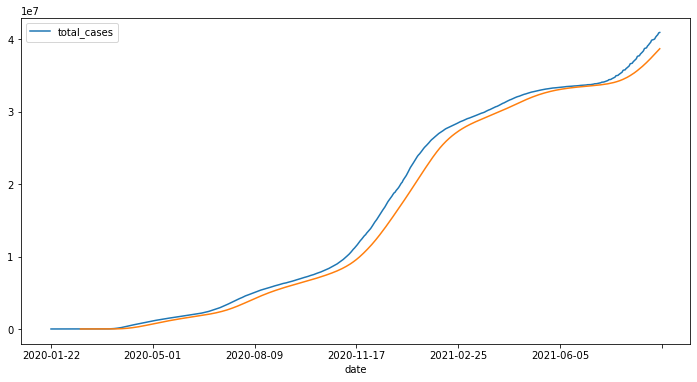

In [16]:
owid_df = pd.read_csv('owid-covid-data.csv')
owid_df.columns
country_df = owid_df.location.unique()

indexer = owid_df[owid_df['location'] == 'United States'].index
us_tc = owid_df.loc[indexer, 'date':'total_cases']
us_tc = us_tc.dropna()
us_tc.set_index('date', inplace=True)
us_tc.plot(figsize=(12,6))
us_tc.rolling(window=30).mean()['total_cases'].plot()

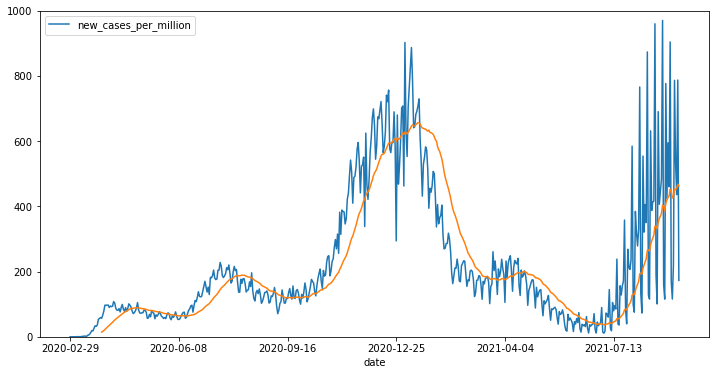

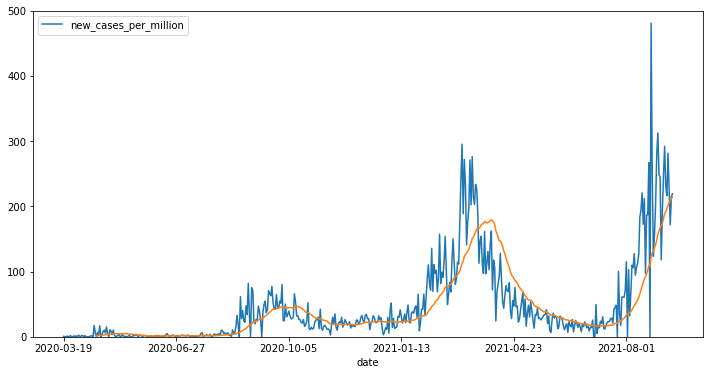

In [4]:
def plot_covid_data(country, col, plot_ma=False, y_max=1000):
    indexer = owid_df[owid_df['location'] == country].index
    country_df = owid_df.loc[indexer, 'date':col]
    country_df = country_df.dropna()
    country_df.set_index('date', inplace=True)
    country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
    country_df.plot(figsize=(12,6), ylim=[0,y_max])
    
    if plot_ma:
        country_df.rolling(window=30).mean()[col].plot()

        
plot_covid_data('United States', 'new_cases_per_million', True)
plot_covid_data('Jamaica', 'new_cases_per_million', True, 500)

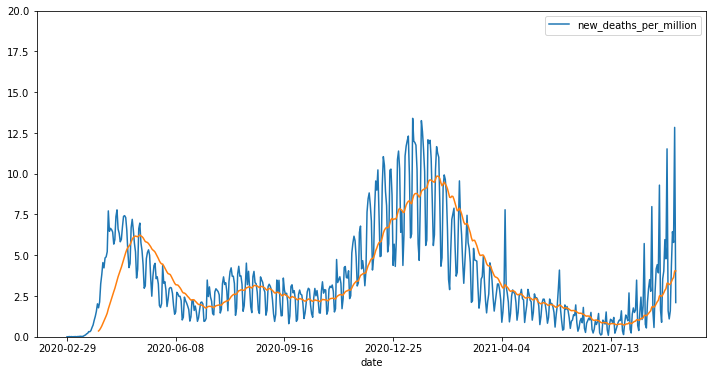

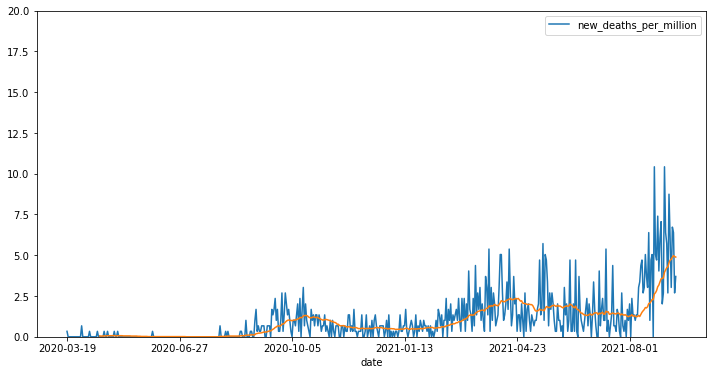

In [9]:
plot_covid_data('United States', 'new_deaths_per_million', True, 20)
plot_covid_data('Jamaica', 'new_deaths_per_million', True, 20)

In [22]:
def scatter_plot(date, col1, col2):
    tot_df = pd.DataFrame(columns = ['date', 'location', col1, col2])
    for c in country_df:
        temp_df = owid_df[(owid_df['location']==c) & (owid_df['date']==date)][['date','location', col1, col2]]
        tot_df = tot_df.append(temp_df, ignore_index = True).fillna(0)
    tot_df.set_index('date', inplace=True)
    
    fig = px.scatter(data_frame=tot_df, x=col2, y=col1, color='location', trendline = 'ols', hover_data=['location'])
    fig.show()
    return tot_df

scatter_plot('2021-09-11', 'total_deaths_per_million', 'aged_70_older')

,location,total_deaths_per_million,aged_70_older
date,,,
2021-09-11,Afghanistan,179.840,1.337
2021-09-11,Africa,147.431,0.000
2021-09-11,Albania,883.766,8.643
2021-09-11,Algeria,124.572,3.857
2021-09-11,Andorra,1680.585,0.000
...,...,...,...
2021-09-11,Vietnam,152.981,4.718
2021-09-11,World,587.320,5.355
2021-09-11,Yemen,51.458,1.583
